In [1]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data=load_breast_cancer()

In [3]:
X=data.data
Y=data.target

In [6]:
X.shape

(569, 30)

In [8]:
#逻辑回归中选择l1和l2正则话，然后进行对比,penanlty选择l1和l2正则化。C表示的是损失函数前面的系数，也就是正则化和损失函数的比重。
lrl1=LR(penalty="l1",solver="liblinear",C=0.5,max_iter=1000)
lrl2=LR(penalty="l2",solver="liblinear",C=0.5,max_iter=1000)
lrl1=lrl1.fit(X,Y)
lrl2=lrl2.fit(X,Y)

In [13]:
accuracy_score(lrl1.predict(X),Y)

0.9578207381370826

In [10]:
Y[:2]

array([0, 0])

In [9]:
# 查看逻辑回归每个特征的重要性，重要性的属性coef_,l1正则化，将一些不重要的特征直接赋值为0
lrl1.coef_

array([[ 4.01420544,  0.03224831, -0.13913745, -0.01623129,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50558154,  0.        , -0.07127729,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24615396, -0.12868068, -0.01439883,  0.        ,
         0.        , -2.02776901,  0.        ,  0.        ,  0.        ]])

In [21]:
#将一些不重要的特征，让这个值无限的趋近到0,
lrl2.coef_

array([[ 1.71382215,  0.25640071,  0.36733918, -0.02318416, -0.08718535,
        -0.31711452, -0.4106251 , -0.20342802, -0.14472253, -0.02331879,
         0.02924762,  0.78873477,  0.57233424, -0.17823106, -0.00311955,
        -0.04133457, -0.03092864, -0.02213251, -0.04241591, -0.00415314,
         1.16778166, -0.39545429, -0.424707  , -0.00976325, -0.16680887,
        -1.0091088 , -1.11884131, -0.42394188, -0.54292559, -0.11491439]])

In [14]:
#不断改变损失函数前面的系数C，来展示准确率
import numpy as np
l1=[]
l2=[]
l1test=[]
l2test=[]
X_train,X_test,Y_train_label,Y_test_label=train_test_split(X,Y,test_size=0.3,random_state=420)
for i in np.linspace(0.05,1,19):
    lrl1=LR(penalty="l1",C=i,max_iter=1000,solver="liblinear")
    lrl2=LR(penalty="l2",C=i,max_iter=1000,solver="liblinear")
    lrl1=lrl1.fit(X_train,Y_train_label)
    lrl2=lrl2.fit(X_train,Y_train_label)
    l1.append(accuracy_score(lrl1.predict(X_train),Y_train_label))
    l1test.append(accuracy_score(lrl1.predict(X_test),Y_test_label))
    l2.append(accuracy_score(lrl2.predict(X_train),Y_train_label))
    l2test.append(accuracy_score(lrl2.predict(X_test),Y_test_label))

In [23]:
l1

[0.9422110552763819,
 0.9447236180904522,
 0.9597989949748744,
 0.9597989949748744,
 0.9597989949748744,
 0.964824120603015,
 0.9623115577889447,
 0.9623115577889447,
 0.9597989949748744,
 0.9597989949748744,
 0.9623115577889447,
 0.964824120603015,
 0.9673366834170855,
 0.9673366834170855,
 0.9698492462311558,
 0.9698492462311558,
 0.9698492462311558,
 0.9698492462311558,
 0.9698492462311558]

In [22]:
l2

[0.9597989949748744,
 0.957286432160804,
 0.957286432160804,
 0.957286432160804,
 0.957286432160804,
 0.957286432160804,
 0.957286432160804,
 0.9623115577889447,
 0.9673366834170855,
 0.964824120603015,
 0.964824120603015,
 0.964824120603015,
 0.9673366834170855,
 0.9698492462311558,
 0.9698492462311558,
 0.9698492462311558,
 0.9698492462311558,
 0.9698492462311558,
 0.9698492462311558]

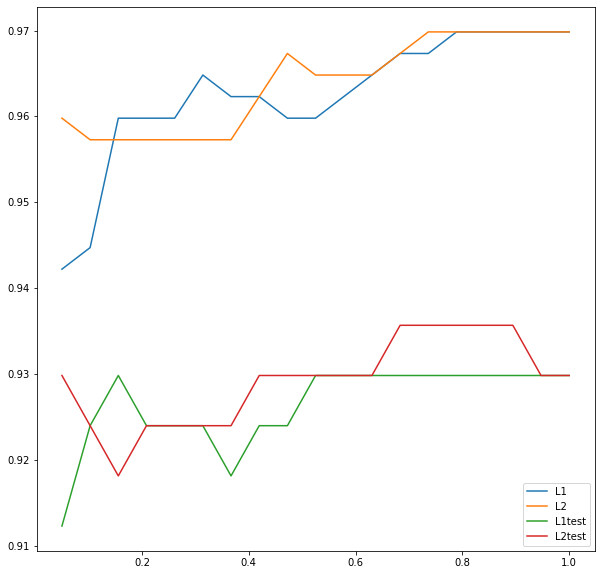

In [25]:
graph = [l1,l2,l1test,l2test]
color = ["green","black","lightgreen","gray"]
label = ["L1","L2","L1test","L2test"]
plt.figure(figsize=(10,10))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],label=label[i])
plt.legend(loc=4)
plt.show()

In [ ]:
#由上面的曲线图可以得到C=0.8的时候表现良好
'''
说到降维，我们首先想到的是之前提过的高效降维算法，PCA和SVD，遗憾的是，这两种方法大多数时候不适用于
逻辑回归。逻辑回归是由线性回归演变而来，线性回归的一个核心目的是通过求解参数来探究特征X与标签y之间的
关系，而逻辑回归也传承了这个性质，我们常常希望通过逻辑回归的结果，来判断什么样的特征与分类结果相关，
因此我们希望保留特征的原貌。PCA和SVD的降维结果是不可解释的，因此一旦降维后，我们就无法解释特征和标
签之间的关系了。当然，在不需要探究特征与标签之间关系的线性数据上，降维算法PCA和SVD也是可以使用的。
'''


但是更有效的方法，毫无疑问会是我们的embedded嵌入法。我们已经说明了，由于L1正则化会使得部分特征对应
的参数为0，因此L1正则化可以用来做特征选择，结合嵌入法的模块SelectFromModel，我们可以很容易就筛选出
让模型十分高效的特征。注意，此时我们的目的是，尽量保留原数据上的信息，让模型在降维后的数据上的拟合效
果保持优秀，因此我们不考虑训练集测试集的问题，把所有的数据都放入模型进行降维。